In [6]:
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Loading the Dataset

In [15]:
datasets = load_dataset('financial_phrasebank', 'sentences_allagree', split='train').train_test_split(test_size=0.2, seed=200)
train_dataset = datasets['train']
test_dataset = datasets['test']

Found cached dataset financial_phrasebank (C:/Users/abhir/.cache/huggingface/datasets/financial_phrasebank/sentences_allagree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141)


# Dataset Analysis

In [16]:
label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
train_df = train_dataset.to_pandas()
test_df = test_dataset.to_pandas()

train_df['length'] = train_df["sentence"].str.split(' ').str.len()
test_df['length'] = test_df["sentence"] .str.split(' ').str.len()

train_df['label'] = train_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)

train_df.head()

,sentence,label,length
0,ZAO YIT Moskovia builds housing in Moscow and ...,Neutral,12
1,"Operating profit totaled EUR 3.8 mn , down fro...",Negative,19
2,Kemira 's R&D organization comprises approxima...,Neutral,13
3,There will be return flights from Stuttgart ev...,Neutral,22
4,Olvi expects sales and market share to increas...,Positive,15


### Distribution of Labels

[Text(0.5, 1.0, 'Test Data')]

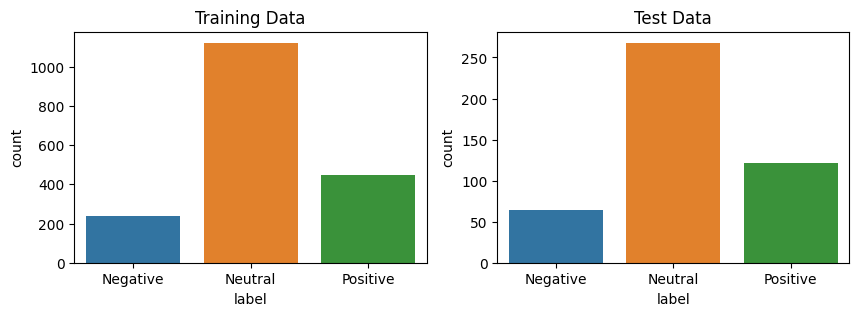

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))
categories = list(label_mapping.values())
sns.countplot(data=train_df, x="label", ax=axs[0], order=categories).set(title='Training Data')
sns.countplot(data=test_df, x="label", ax=axs[1], order=categories).set(title='Test Data')

### Distribution of Length of Sentences

[Text(0.5, 1.0, 'Test Data')]

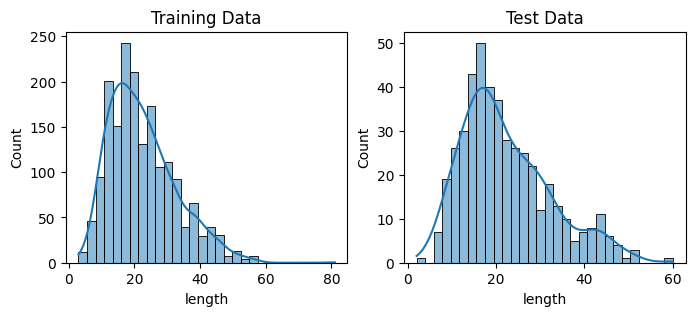

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
sns.histplot(train_df, x="length", ax=axs[0], bins=30, kde=True).set(title='Training Data')
sns.histplot(test_df, x="length", ax=axs[1], bins=30, kde=True).set(title='Test Data')

### Word Cloud of Training and Test Data

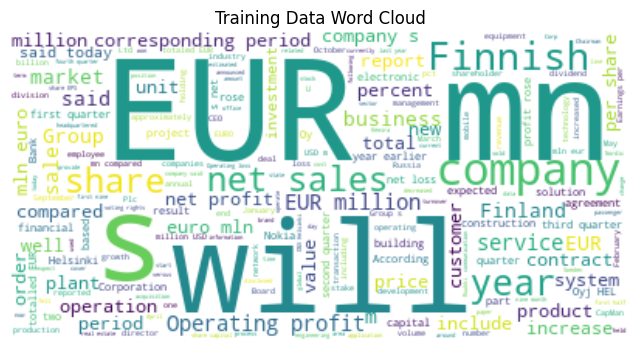

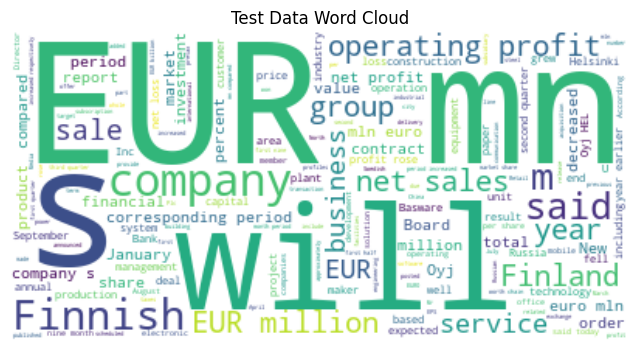

In [19]:
def display_wordcloud(sentences, title=None):
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(8,6))
    plt.imshow(wc.generate(sentences), interpolation='bilinear')
    
    if title:
        plt.title(title, fontsize=12)

    plt.axis('off')
    plt.show()
    
# Training data words
display_wordcloud(" ".join([sentence for sentence in train_df['sentence']]), "Training Data Word Cloud")
display_wordcloud(" ".join([sentence for sentence in test_df['sentence']]), "Test Data Word Cloud")